# EDA Разведывательный анализ данных Unicef

Цель проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Импортируем данные и прочитаем файл:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 100)  # показывать больше строк
pd.set_option('display.max_columns', 100)  # показывать больше колонок

students_init = pd.read_csv('stud_math.csv')  # основной датасет

Посмотрим, какие данные хранятся в датасете и какие типы данных у столбцов:

In [2]:
display(students_init.head(30))
students_init.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В датасете содержится 30 столбцов. 13 числовых и 17 строковых.
Посмотрим, присутствуют ли в столбцах пустые значения:

In [3]:
display(students_init.isnull().any())
print(
    f'В датасете содержится {students_init.isnull().any().sum()} колонок с пустыми значениями.')

school                 False
sex                    False
age                    False
address                 True
famsize                 True
Pstatus                 True
Medu                    True
Fedu                    True
Mjob                    True
Fjob                    True
reason                  True
guardian                True
traveltime              True
studytime               True
failures                True
schoolsup               True
famsup                  True
paid                    True
activities              True
nursery                 True
studytime, granular     True
higher                  True
internet                True
romantic                True
famrel                  True
freetime                True
goout                   True
health                  True
absences                True
score                   True
dtype: bool

В датасете содержится 27 колонок с пустыми значениями.


Как видно выше, первые 3 столбца не содержат пропущенных значений. Пустые значения в остальных 27 столбцах рассмотрим во время анализа каждого столбца по-отдельности.

## 1. School (аббревиатура школы). 
Посмотрим, какие школы содержит наш датасет:

In [4]:
pd.DataFrame(students_init.school.value_counts(dropna=False, normalize=True))

,school
GP,0.883544
MS,0.116456


В столбце school (номинативная переменная) присутствует только 2 школы, GP и MS. Данных об учениках из школы GP значительно больше, чем из школы MS. Из предыдущего шага видно, что пустые значения в этом столбце отсутствуют.

## 2. Cтолбец Sex (пол ученика):
('F' - женский, 'M' - мужской)

In [5]:
pd.DataFrame(students_init.sex.value_counts(dropna=False, normalize=True))

,sex
F,0.526582
M,0.473418


Столбец sex (качественная (номинативная) переменная) содержит адекватные данные - 2 пола, мужской и женский. Учениц больше, чем учеников. Пустые значения отсутствуют.

## 3. Age (возраст ученика). 
Это числовой столбец. Рассмотрим распределение учеников по возрасту:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

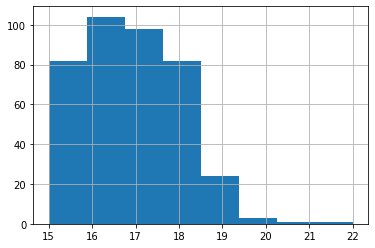

In [6]:
# построим гистограмму распределения возрастов
students_init.age.hist(bins=8)
students_init.age.describe()

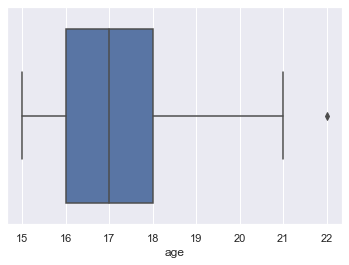

In [7]:
# рассмотрим также данные на боксплоте:
sns.set()
sns.boxplot(students_init['age'])

Видно, что в школах присутствуют ученики возраста от 15 до 22 лет. Основное распределение лежит между возрастом 16-18 лет, медиана - 17 лет. Учеников возраста 20+ в датасете очень малое количество. На боксплоте видны выбросы (возраст 22 года). Пользуясь здравым смыслом, не будем удалять выбросы возраста, они пригодятся для оценки корреляции между итоговым баллом и возрастом.

## 4.Address - тип адреса ученика 
('U' - городской, 'R' - за городом):

In [8]:
pd.DataFrame(students_init.address.value_counts(dropna=False, normalize=True))

,address
U,0.746835
R,0.210127
NaN,0.043038


Столбец номинативный. U - городской адрес, R - загородный адрес. Учеников с городским адресом значительно больше, чем с сельским. Присутствуют нулевые значения. Однако процент пустых значений небольшой (4%), можно заменить их модой - значением U.

In [12]:
# заменим значения Nan на моду
students_init.address = students_init.address.astype(str).apply(lambda x: 'U' if x == 'nan' else x)
# посмотрим на изменения значений в датасете
pd.DataFrame(students_init.address.value_counts(dropna=False, normalize=True))

,address
U,0.789873
R,0.210127


## 5. Famsize 
содержит номинативные данные о размере семьи ('LE3' <= 3, 'GT3' >3):

In [13]:
pd.DataFrame(students_init.famsize.value_counts(dropna=False, normalize=True))

,famsize
GT3,0.729114
LE3,0.270886


Как видно, большинство учеников из "больших" семей. Столбец также содержит нулевые значения. Заменим нулевые значения модой 'GT3':

In [14]:
# заменим значения Nan на моду
students_init.famsize = students_init.famsize.astype(
    str).apply(lambda x: 'GT3' if x == 'nan' else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.famsize.value_counts(dropna=False, normalize=True))

,famsize
GT3,0.729114
LE3,0.270886


## 6. Pstatus  — статус совместного жилья родителей 
номинативные данные о статусе совместного проживания родителей ('T' - живут вместе 'A' - раздельно):

In [15]:
pd.DataFrame(students_init.Pstatus.value_counts(dropna=False, normalize=True))

,Pstatus
T,0.794937
NaN,0.113924
A,0.091139


Как видно по процентному соотношению - в большинстве семей родители живут вместе. Достаточно много "неизвестных" значений. Заменим их на моду 'T'.

In [16]:
students_init.Pstatus = students_init.Pstatus.astype(
    str).apply(lambda x: 'T' if x == 'nan' else x)
# посмотрим на изменения в датасете students
pd.DataFrame(students_init.Pstatus.value_counts(dropna=False, normalize=True))

,Pstatus
T,0.908861
A,0.091139


## 7. Medu — образование матери 
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее):

In [17]:
pd.DataFrame(students_init.Medu.value_counts(dropna=False, normalize=True))

,Medu
4.0,0.331646
2.0,0.258228
3.0,0.245570
1.0,0.149367
0.0,0.007595
NaN,0.007595


Ранговый столбец. 
Большинство матерей (33%) с высшим образованием, и меньше 1% матерей не имеют образования. В колонке мало пропущенных значений, заменим их модой 4 - высшее образование:

In [18]:
# заменим значения Nan на моду
students_init.Medu = students_init.Medu.apply(
    lambda x: 4.0 if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.Medu.value_counts(dropna=False, normalize=True))

,Medu
4.0,0.339241
2.0,0.258228
3.0,0.245570
1.0,0.149367
0.0,0.007595


## 8. Fedu — образование отца 
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее):

In [19]:
# посмотрим, как распределяется образование отцов
pd.DataFrame(students_init.Fedu.value_counts(dropna=False, normalize=True))

,Fedu
2.0,0.268354
3.0,0.243038
4.0,0.222785
1.0,0.197468
NaN,0.060759
0.0,0.005063
40.0,0.002532


Ранговый столбец.
Большинство отцов получило образование 5-9 классов (чуть меньшее количество - среднее специальное или высшее). 0.5% отцов без образования вообще. Неизвестных значений около 6%. Есть ошибочное значение 40.0 - скорее всего имелось в виду высшее образование 4.0, заменим его на 4.0:

In [20]:
students_init['Fedu'] = students_init['Fedu'].replace(
    40, 4)  # заменим неверное значение 40 на 4
pd.DataFrame(students_init.Fedu.value_counts(
    dropna=False, normalize=True))  # посмотрим на изменения

,Fedu
2.0,0.268354
3.0,0.243038
4.0,0.225316
1.0,0.197468
NaN,0.060759
0.0,0.005063


Как видно, в образовании отца нет "яркого" лидера. Разница в процентах небольшая между уровнями образования 2-3, 3-4, 4-1. Поэтому 6% неизвестных значений будет некорректно заменять модой. Можно предроложить, что образование закономерно связано с образованием матери. Построим тепловую карту, чтобы оценить:

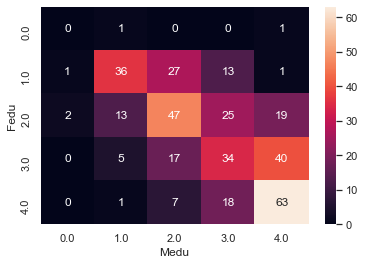

In [21]:
sns.heatmap(pd.crosstab(
    students_init['Fedu'], students_init['Medu']), annot=True)

Как можно заметить, уровень образования матери и отца в большинстве случаев схож. Поэтому пропущенные значения в образовании отца можно заменить образованием матери.

In [22]:
# пустые значения в образовании отца
students_init[pd.isnull(students_init['Fedu'])]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,T,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,U,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


In [23]:
# заменим пустые значения образования отца образованием матери
students_init.Fedu = students_init.Fedu.mask(
    students_init.Fedu.isnull(), students_init.Medu)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.Fedu.value_counts(dropna=False, normalize=True))

,Fedu
2.0,0.278481
3.0,0.260759
4.0,0.250633
1.0,0.205063
0.0,0.005063


Видно, что после преобразований общая тенденция в распределении образования отцов сохранилась. Так нам удалось "равномерно" заполнить пустые значения.

## 9. Mjob — работа матери 
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое).

In [24]:
pd.DataFrame(students_init.Mjob.value_counts(dropna=False, normalize=True))

,Mjob
other,0.336709
services,0.248101
at_home,0.146835
teacher,0.139241
health,0.081013
NaN,0.048101


Номинативный столбец. 
Большинство профессий принадлежит к категории other. Есть также 4.8% пустых значений - заменим их модой other.

In [25]:
# заменим значения Nan на моду
students_init.Mjob = students_init.Mjob.apply(
    lambda x: 'other' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.Mjob.value_counts(dropna=False, normalize=True))

,Mjob
other,0.384810
services,0.248101
at_home,0.146835
teacher,0.139241
health,0.081013


## 10. Fjob — работа отца 
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое).

In [26]:
pd.DataFrame(students_init.Fjob.value_counts(dropna=False, normalize=True))

,Fjob
other,0.498734
services,0.258228
NaN,0.091139
teacher,0.073418
at_home,0.040506
health,0.037975


Номинативный столбец. 
Распределение значений в целом похоже на распределение в Mjob. Точно так же самый большой процент приходится на значение other (причем с большим отрывом от следующего значения services). Так, значения NaN тоже можно заменить модой other.

In [27]:
# заменим значения Nan на моду
students_init.Fjob = students_init.Fjob.apply(
    lambda x: 'other' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.Fjob.value_counts(dropna=False, normalize=True))

,Fjob
other,0.589873
services,0.258228
teacher,0.073418
at_home,0.040506
health,0.037975


## 11. reason — причина выбора школы 
('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). 

In [28]:
pd.DataFrame(students_init.reason.value_counts(dropna=False, normalize=True))

,reason
course,0.346835
home,0.263291
reputation,0.260759
other,0.086076
NaN,0.043038


Номинативный столбец.
Самая главная причина выбора школы - образовательная программа. Чуть менее популярны причины близость к дому и репутация.
Заменим значения NaN на "популярную" причину - моду course.

In [29]:
# заменим значения Nan на моду
students_init.reason = students_init.reason.apply(
    lambda x: 'course' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.reason.value_counts(dropna=False, normalize=True))

,reason
course,0.389873
home,0.263291
reputation,0.260759
other,0.086076


## 12. guardian — опекун 
('mother' - мать, 'father' - отец, 'other' - другое). 

In [30]:
pd.DataFrame(students_init.guardian.value_counts(dropna=False, normalize=True))

,guardian
mother,0.632911
father,0.217722
NaN,0.078481
other,0.070886


Номинативный столбец.
В большинстве случаев опекуном является мать. Значения NaN тоже заменим на моду mother.

In [31]:
# заменим значения Nan на моду
students_init.guardian = students_init.guardian.apply(
    lambda x: 'mother' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.guardian.value_counts(dropna=False, normalize=True))

,guardian
mother,0.711392
father,0.217722
other,0.070886


## 13. traveltime — время в пути до школы 
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)



In [32]:
pd.DataFrame(students_init.traveltime.value_counts(
    dropna=False, normalize=True))

,traveltime
1.0,0.612658
2.0,0.243038
NaN,0.070886
3.0,0.055696
4.0,0.017722


Ранговый столбец. Большинство значений приходится на интервал < 15 минут. Есть 7% пустых значений, которые можем заменить модой 1.

In [33]:
# заменим значения Nan на моду
students_init.traveltime = students_init.traveltime.apply(
    lambda x: 1 if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.traveltime.value_counts(
    dropna=False, normalize=True))

,traveltime
1.0,0.683544
2.0,0.243038
3.0,0.055696
4.0,0.017722


## 14. studytime — время на учёбу помимо школы в неделю 
(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [34]:
pd.DataFrame(students_init.studytime.value_counts(
    dropna=False, normalize=True))

,studytime
2.0,0.491139
1.0,0.260759
3.0,0.162025
4.0,0.068354
NaN,0.017722


Ранговый столбец. Как видно, в основном дополнительное образование занимает от 2 до 5 часов в неделю. Есть 1% пустых значений, которые опять-таки можно заменить модой.

In [35]:
# заменим значения NaN на моду
students_init.studytime = students_init.studytime.apply(
    lambda x: 1 if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.studytime.value_counts(
    dropna=False, normalize=True))

,studytime
2.0,0.491139
1.0,0.278481
3.0,0.162025
4.0,0.068354


# 15. failures — количество внеучебных неудач 
(n, если 1<=n<=3, иначе 0).

In [36]:
pd.DataFrame(students_init.failures.value_counts(dropna=False, normalize=True))

,failures
0.0,0.741772
1.0,0.124051
NaN,0.055696
2.0,0.040506
3.0,0.037975


Ранговый столбец. Количество внеучебных задач в большинстве своем - 0 (выходят за рамки значений 1,2,3 как в меньшую, так и большую сторону, о чем мы можем только догадываться). 5.5% пустых значений отнесем к моде 0:

In [37]:
# заменим значения NaN на моду
students_init.failures = students_init.failures.apply(
    lambda x: 1 if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.failures.value_counts(dropna=False, normalize=True))

,failures
0.0,0.741772
1.0,0.179747
2.0,0.040506
3.0,0.037975


## 16. schoolsup — дополнительная образовательная поддержка (yes или no). 

In [38]:
pd.DataFrame(students_init.schoolsup.value_counts(
    dropna=False, normalize=True))

,schoolsup
no,0.848101
yes,0.129114
NaN,0.022785


Номинативный столбец. Большинство учеников не получают дополнительной образовательной поддержки. Данные о 2.3% учеников не известны, но мы заменим их также модой no

In [39]:
# заменим значения NaN на моду
students_init.schoolsup = students_init.schoolsup.apply(
    lambda x: 'no' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.schoolsup.value_counts(
    dropna=False, normalize=True))

,schoolsup
no,0.870886
yes,0.129114


## 17. Столбец famsup — семейная образовательная поддержка (yes или no). 

In [40]:
pd.DataFrame(students_init.famsup.value_counts(dropna=False, normalize=True))

,famsup
yes,0.554430
no,0.346835
NaN,0.098734


Номинативный столбец. Семейная поддержка обеспечена большинству учеников. Значения NaN опять заменим модой

In [41]:
# заменим значения NaN на моду
students_init.famsup = students_init.famsup.apply(
    lambda x: 'yes' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.famsup.value_counts(dropna=False, normalize=True))

,famsup
yes,0.653165
no,0.346835


## 18. paid  - дополнительные платные занятия по математике 
(yes или no):

In [42]:
pd.DataFrame(students_init.paid.value_counts(dropna=False, normalize=True))

,paid
no,0.506329
yes,0.392405
NaN,0.101266


Номинативный столбец. В столбце присутствует около 10% пустых значений. В датасете нету столбца, из которого можно былоо бы вывести приблизительно правило о платных занятиях, поэтому будем считать, сто учениеки скорее не ходят на платные занятия, а пропуски заменим на моду no.

In [43]:
# заменим значения NaN на моду
students_init.paid = students_init.paid.apply(
    lambda x: 'no' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.paid.value_counts(dropna=False, normalize=True))

,paid
no,0.607595
yes,0.392405


## 19. activities — дополнительные внеучебные занятия 
(yes или no):


In [44]:
pd.DataFrame(students_init.activities.value_counts(
    dropna=False, normalize=True))

,activities
yes,0.493671
no,0.470886
NaN,0.035443


Номинативный столбец. Количество учеников, посещающих дополнительные внеучебные занятия чуть выше, чем непосещающих. Пустых значений достаточно мало, поэтому заменим их модой также.

In [45]:
# заменим значения NaN на моду
students_init.activities = students_init.activities.apply(
    lambda x: 'yes' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.activities.value_counts(
    dropna=False, normalize=True))

,activities
yes,0.529114
no,0.470886


## 20. nursery  -  посещал детский сад
(yes или no):

In [46]:
pd.DataFrame(students_init.nursery.value_counts(dropna=False, normalize=True))

,nursery
yes,0.759494
no,0.200000
NaN,0.040506


Номинативный столбец. Большинство учеников посещало детский сад, пустых значений не так много, можно заменить их модой yes:

In [47]:
# заменим значения NaN на моду
students_init.nursery = students_init.nursery.apply(
    lambda x: 'yes' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.nursery.value_counts(dropna=False, normalize=True))

,nursery
yes,0.8
no,0.2


## 21. studytime, granular

Описание данного столбца отсутствует. Посмотрим, какие значения он содержит:

In [48]:
pd.DataFrame(students_init['studytime, granular'].value_counts(
    dropna=False, normalize=True))

,"studytime, granular"
-6.0,0.491139
-3.0,0.260759
-9.0,0.162025
-12.0,0.068354
NaN,0.017722


Без описания сложно понять, какие данные содержит столбец, но значения все же похожи больше на качественные. Поэтому заменим NaN модой

In [49]:
# заменим значения NaN на моду
students_init['studytime, granular'] = students_init['studytime, granular'].apply(
    lambda x: -6 if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init['studytime, granular'].value_counts(
    dropna=False, normalize=True))

,"studytime, granular"
-6.0,0.508861
-3.0,0.260759
-9.0,0.162025
-12.0,0.068354


## 22. higher  - хочет получить высшее образование
(yes или no)

In [50]:
pd.DataFrame(students_init.higher.value_counts(dropna=False, normalize=True))

,higher
yes,0.901266
NaN,0.050633
no,0.048101


Номинативный столбец. Почти все ученики стремятся получить высшее оразование. Можно смело заменять пустые значения модой yes

In [51]:
# заменим значения NaN на моду
students_init.higher = students_init.higher.apply(
    lambda x: 'yes' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.higher.value_counts(dropna=False, normalize=True))

,higher
yes,0.951899
no,0.048101


## 23. internet -  наличие интернета дома 
(yes или no):

In [52]:
pd.DataFrame(students_init.internet.value_counts(dropna=False, normalize=True))

,internet
yes,0.772152
no,0.141772
NaN,0.086076


Номинативный столбец. Большинству учеников интернет доступен. Пропуски заменим модой yes

In [53]:
# заменим значения NaN на моду
students_init.internet = students_init.internet.apply(
    lambda x: 'yes' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.internet.value_counts(dropna=False, normalize=True))

,internet
yes,0.858228
no,0.141772


## 24. romantic — в романтических отношениях (yes или no):

In [54]:
pd.DataFrame(students_init.romantic.value_counts(dropna=False, normalize=True))

,romantic
no,0.607595
yes,0.313924
NaN,0.078481


Номинативный столбец. Большинство учеников не состоит в романтических отношениях. Заменим пропуски на моду no

In [55]:
# заменим значения NaN на моду
students_init.romantic = students_init.romantic.apply(
    lambda x: 'no' if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.romantic.value_counts(dropna=False, normalize=True))

,romantic
no,0.686076
yes,0.313924


## 25. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо):

In [56]:
pd.DataFrame(students_init.famrel.value_counts(dropna=False, normalize=True))

,famrel
4.0,0.460759
5.0,0.250633
3.0,0.156962
NaN,0.068354
2.0,0.043038
1.0,0.017722
-1.0,0.002532


В целом, отношения в семьях хорошие. Большинство оценивает семейные отношения как 4. Т.к столбец ранговый - заменим Nan на моду 4. Значение -1.0 выглядит ошибочным. Заменим его на 1.0.

In [57]:
# заменим значения NaN на моду
students_init.famrel = students_init.famrel.apply(
    lambda x: 4 if pd.isnull(x) else x)
# заменим значения -1 на 1
students_init['famrel'] = students_init['famrel'].replace(-1, 1)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.famrel.value_counts(dropna=False, normalize=True))

,famrel
4.0,0.529114
5.0,0.250633
3.0,0.156962
2.0,0.043038
1.0,0.020253


## 26. freetime — свободное время после школы 
(от 1 - очень мало до 5 - очень много):



In [58]:
pd.DataFrame(students_init.freetime.value_counts(dropna=False, normalize=True))

,freetime
3.0,0.387342
4.0,0.283544
2.0,0.159494
5.0,0.096203
1.0,0.045570
NaN,0.027848


Как видно, большая часто учеников имеет достаточно много свободного времени. Т.к. столбец ранговый - заменим Nan на моду 3.0:

In [59]:
# заменим значения NaN на моду
students_init.freetime = students_init.freetime.apply(
    lambda x: 3 if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.freetime.value_counts(dropna=False, normalize=True))

,freetime
3.0,0.415190
4.0,0.283544
2.0,0.159494
5.0,0.096203
1.0,0.045570


## 27. goout — проведение времени с друзьями 
(от 1 - очень мало до 5 - очень много):

In [60]:
pd.DataFrame(students_init.goout.value_counts(dropna=False, normalize=True))

,goout
3.0,0.321519
2.0,0.255696
4.0,0.212658
5.0,0.131646
1.0,0.058228
NaN,0.020253


Ученики достаточно много времени проводят с друзьями. 
Пустых значение немного, и т.к. столбец ранговый - заменим Nan на моду 3.0:

In [61]:
# заменим значения NaN на моду
students_init.goout = students_init.goout.apply(
    lambda x: 3 if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.goout.value_counts(dropna=False, normalize=True))

,goout
3.0,0.341772
2.0,0.255696
4.0,0.212658
5.0,0.131646
1.0,0.058228


## 28. health — текущее состояние здоровья 
(от 1 - очень плохо до 5 - очень хорошо)

In [62]:
pd.DataFrame(students_init.health.value_counts(dropna=False, normalize=True))

,health
5.0,0.349367
3.0,0.225316
4.0,0.159494
1.0,0.118987
2.0,0.108861
NaN,0.037975


Большинство учеников имеют очень хорошее здоровье. 
Пустых значение немного, и т.к. столбец ранговый - заменим Nan на моду 5.0:

In [63]:
# заменим значения NaN на моду
students_init.health = students_init.health.apply(
    lambda x: 5 if pd.isnull(x) else x)
# посмотрим на изменения в датасете
pd.DataFrame(students_init.health.value_counts(dropna=False, normalize=True))

,health
5.0,0.387342
3.0,0.225316
4.0,0.159494
1.0,0.118987
2.0,0.108861


## 29. absences — количество пропущенных занятий. 

Посмотрим, как много строк заполнено пустыми значениями:

In [64]:
students_init.absences.isnull().sum()

12

Посмотрим на распределение пропусков:

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

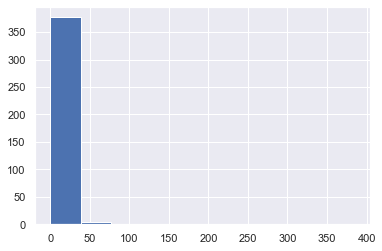

In [65]:
students_init.absences.hist()
students_init.absences.describe()

Т.к. столбец количественный - заменим NaN значением медианы 4:

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

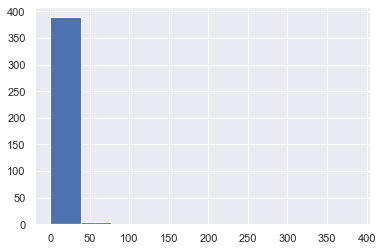

In [66]:
# заменим значения NaN на медиану
students_init.absences = students_init.absences.apply(
    lambda x: 4 if pd.isnull(x) else x)
# оценим, как изменилось распределение:
students_init.absences.hist()
students_init.absences.describe()

Наблюдается очень большой разброс в значениях. От 0 до 385. Но большинство пропусков приходится на интервал 0-8. 
Неясно, имеется в виду количество пропущенных занятий или учебных дней. Если дней - то такие значения как 385 выглядят нереальными. Посмотрим, какие выбросы содержатся в этом столбце и устраним их.

In [67]:
median = students_init.absences.median()
IQR = students_init.absences.quantile(
    0.75) - students_init.absences.quantile(0.25)
perc25 = students_init.absences.quantile(0.25)
perc75 = students_init.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Как видим, границы выбросов от -12 до 20. Нижняя граница выбросов для нас неактуальна, очистим те данные, которые вызодят за пределы верхекй границы. Это поможет нам отфильтровать экстремально большое количество пропусков:

In [68]:
students_init = students_init[students_init.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

count    378.000000
mean       4.584656
std        4.886996
min        0.000000
25%        0.000000
50%        4.000000
75%        6.750000
max       20.000000
Name: absences, dtype: float64

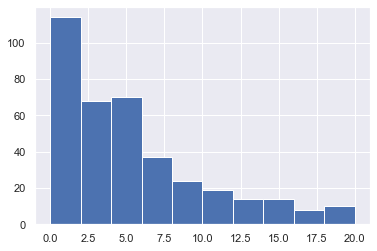

In [69]:
# оценим, как изменилось распределение:
students_init.absences.hist()
students_init.absences.describe()

Теперь в нашем датасете содержаться только строки с количеством пропусков от 0 до 20, что выглядит гораздо реалистичнее с точки зрения здравого смысла.

## 30. score — баллы по госэкзамену по математике. 


Количественный столбец. Это наша целевая переменная. Посмотрим, есть ли пустые значения и как много:

In [70]:
students_init.score.isnull().sum()

6

In [71]:
# показать строки с NaN в колонке score
students_init[students_init.score.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,no,no,4.0,3.0,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,U,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,4.0,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,3.0,4.0,3.0,NaN
350,MS,M,19,U,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,yes,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


Удалим строки с пустыми значениями, т.к. они не несут никакого смысла для обучения модели. 
Т.к. мы заменили уже все  NaN в остальных колонках датасета, то теперь можем использовать функцию dropna(), которая удалит все строки с NaN (в нашем случае только из столбца score):

In [72]:
students_init.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [73]:
# посморим, какие оценки присутствуют в датасете
students_init.score.value_counts(dropna=False, normalize=True)

50.0     0.145161
55.0     0.112903
0.0      0.099462
75.0     0.088710
60.0     0.083333
65.0     0.080645
40.0     0.075269
70.0     0.072581
45.0     0.061828
80.0     0.043011
30.0     0.037634
90.0     0.026882
35.0     0.024194
25.0     0.018817
95.0     0.013441
85.0     0.013441
100.0    0.002688
Name: score, dtype: float64

Посмотрим на распределение оценок:

count    372.000000
mean      52.231183
std       23.072493
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

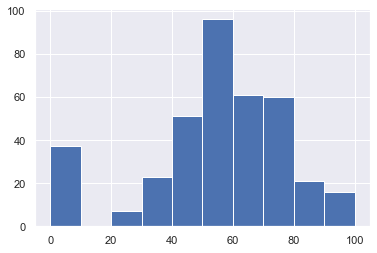

In [74]:
students_init.score.hist(bins=10)
students_init.score.describe()

Судя по всему используется 100-бальная система оценок. Средняя оценка 52.3 близка к медиане 55. Основное распределение приходится на баллы 40-70

Видим, что много учеников имеют оценку 0. 

In [75]:
students_init[students_init.score == 0]  # отобразим учеников с баллом 0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,GT3,T,2.0,2.0,other,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,T,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,no,4.0,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,3.0,other,other,course,other,1.0,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,course,father,2.0,4.0,0.0,yes,yes,no,yes,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,yes,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


С точки зрения здравого смысла оценка 0 выглядит малореальной. Либо это ошибки в датасете, либо это оценка ученику, который не пришел на экзамен. Кажется лучшим решением в этом случае удалить строки с оценкой 0, ибо они могут только мешать в дальнейшем обучении модели.

In [76]:
# оставим только строки с оценками больше нуля
students_init.score = students_init.score[students_init.score > 0]

count    335.000000
mean      58.000000
std       15.991203
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

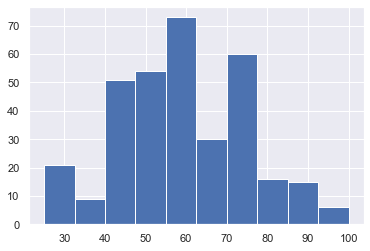

In [77]:
# посмотрим на обновленное распределение
students_init.score.hist()
students_init.score.describe()

Посмотрим, есть ли в обработанном столбце выбросы. 

In [78]:
median = students_init.score.median()
IQR = students_init.score.quantile(0.75) - students_init.score.quantile(0.25)
perc25 = students_init.score.quantile(0.25)
perc75 = students_init.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


После удаления нулей распределение признака выглядит адекватным, выбросов нет.

Выясним, какие столбцы коррелируют с баллом госэкзамена. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

In [79]:
students_init.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.162361,-0.179726,0.077567,-0.011880,0.156754,0.013257,0.050814,0.037190,0.135858,-0.058342,0.153536,-0.129999
Medu,-0.162361,1.000000,0.633707,-0.167706,0.094118,-0.231090,-0.094542,-0.002328,0.060475,0.060909,-0.067355,0.064673,0.194707
Fedu,-0.179726,0.633707,1.000000,-0.122337,0.023249,-0.256917,-0.021366,-0.006265,0.012833,0.053848,0.003564,-0.004628,0.135609
traveltime,0.077567,-0.167706,-0.122337,1.000000,-0.080670,0.048629,0.085524,-0.026857,-0.005893,0.039333,-0.034196,-0.038600,-0.068172
studytime,-0.011880,0.094118,0.023249,-0.080670,1.000000,-0.186595,-0.987424,0.030215,-0.136328,-0.045080,-0.068212,-0.076658,0.129510
failures,0.156754,-0.231090,-0.256917,0.048629,-0.186595,1.000000,0.182371,-0.008510,0.081381,0.093876,0.091519,0.059902,-0.244973
"studytime, granular",0.013257,-0.094542,-0.021366,0.085524,-0.987424,0.182371,1.000000,-0.035604,0.134002,0.041836,0.069689,0.073936,-0.145796
famrel,0.050814,-0.002328,-0.006265,-0.026857,0.030215,-0.008510,-0.035604,1.000000,0.164048,0.066484,0.085726,-0.085523,0.054381
freetime,0.037190,0.060475,0.012833,-0.005893,-0.136328,0.081381,0.134002,0.164048,1.000000,0.281397,0.059586,0.089457,0.005544
goout,0.135858,0.060909,0.053848,0.039333,-0.045080,0.093876,0.041836,0.066484,0.281397,1.000000,-0.005551,0.108218,-0.155254


#### Наиболее скоррелироваными с целевой переменной оказались переменные:<br>
<b>Failures</b> (-0.24, отрицательная корреляция - чем больше внеучебных неудач - чем ниже обычно и итоговая оценка в школе),<br> 
<b>absences</b> (-0.239 - отрицательная корреляция - чем больше пропусков - тем ниже оценка),<br>  
<b>Medu</b> (0.19 - чем выше образование матери - тем выше итоговая оценка),<br> 
<b>goout</b> (-0.155 - отрицательная корреляция - чем больше ребенок проводит времени с друзьями - тем ниже балл),<br>
<b>Fedu</b> (0.135 - чем выше образование отца - тем выше итоговый балл),<br>
<b>age</b> (-0.129 - отрицательная корреляция - чем ниже возраст ученика - тем более высокий итоговый балл он имеет (возможно, более старшие ученики - те, кто оставался на второй год?),<br> 
<b>studytime</b> (0.129 - чем больше времени тратится на дополнительное обучение - тем более высокий итоговый балл,<br> 
<b>studytime, granular</b> (-0.145 - неизвестная переменная, но как видно, почти полностью скоррелирована со studytime<br>

<br>
Неясно, что за переменная <b>stadytime,granular</b>. Для модели можно исключить, т.к. почти полностью (0.98) скореллирована со <b>studytime</b>.<br>
<br>
Высокий коэфициент корреляции (0.63) наблюдается между образованием матери <b>Medu</b> и отца <b>Fedu</b>. Говорит о том, что чем выше образование матери - тем выше и образование отца.


Далее рассмотрим, различаются ли распределения <b>score</b> в зависимости от значения номинативных переменных.
Номинативные переменные (включая ранговые): <b>'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health'.</b>

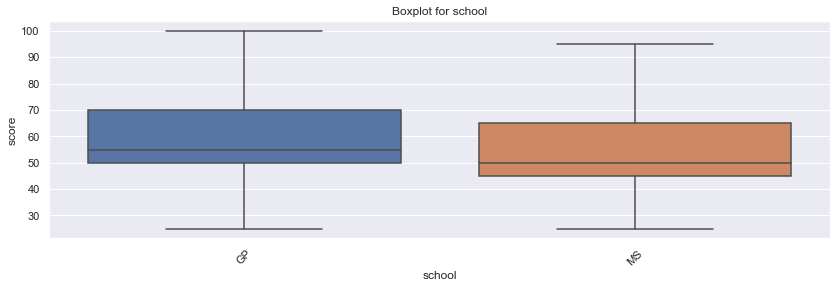

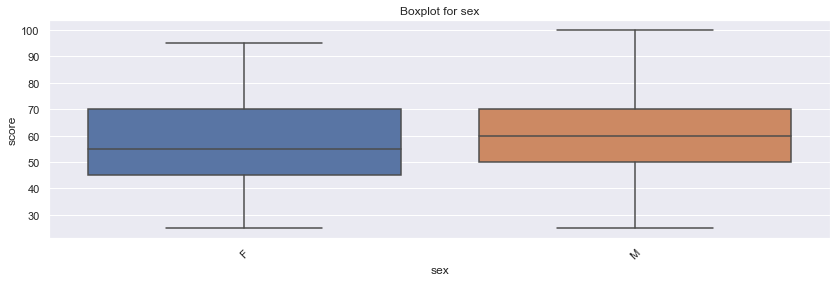

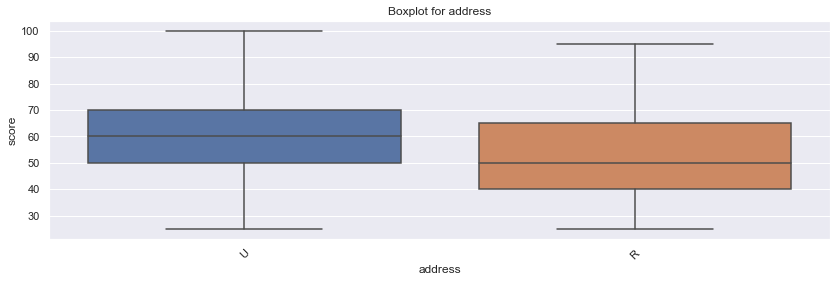

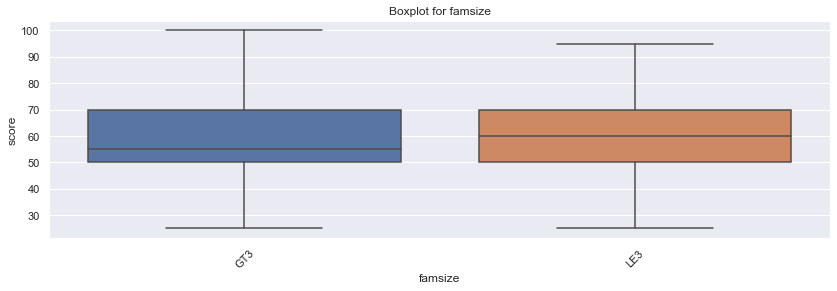

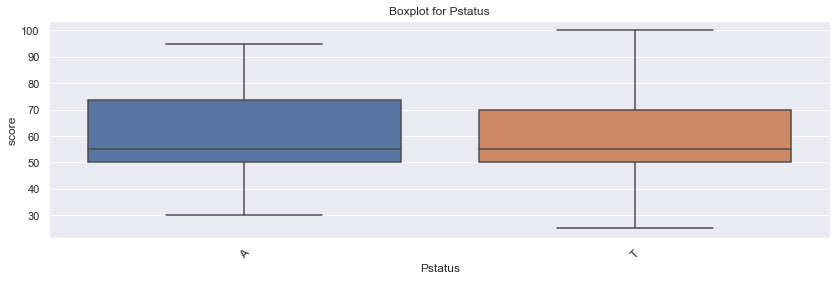

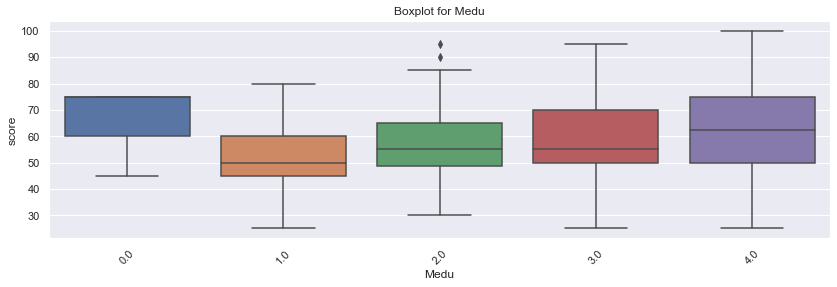

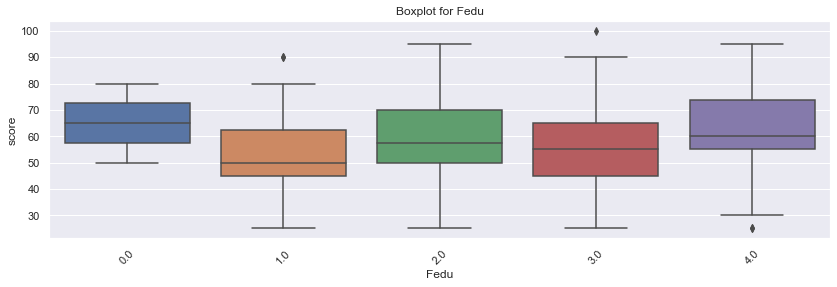

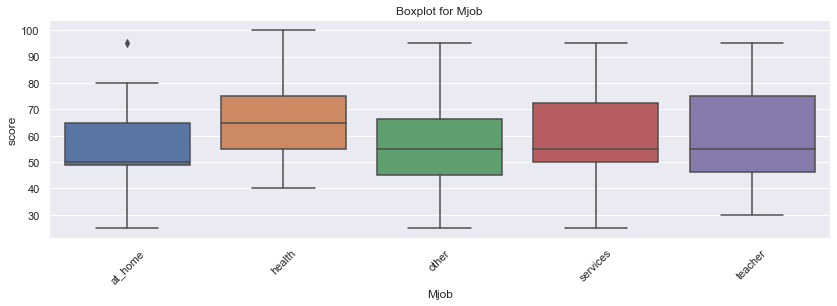

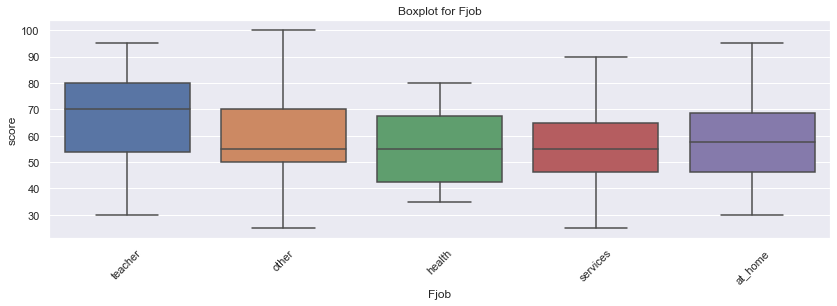

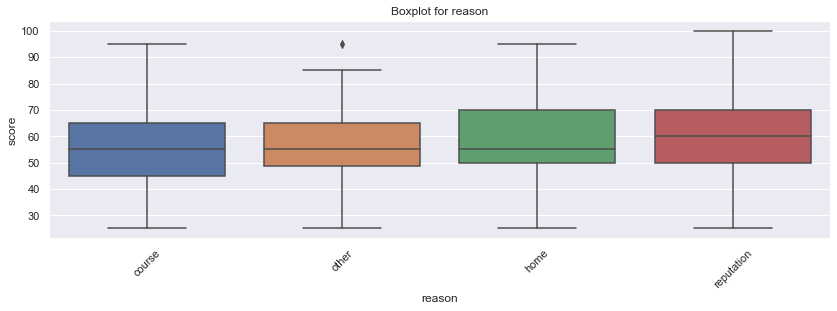

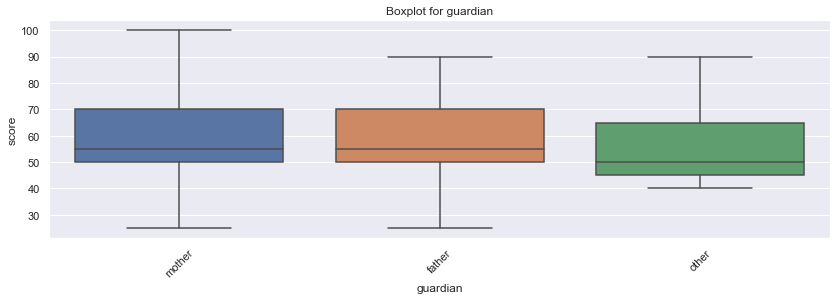

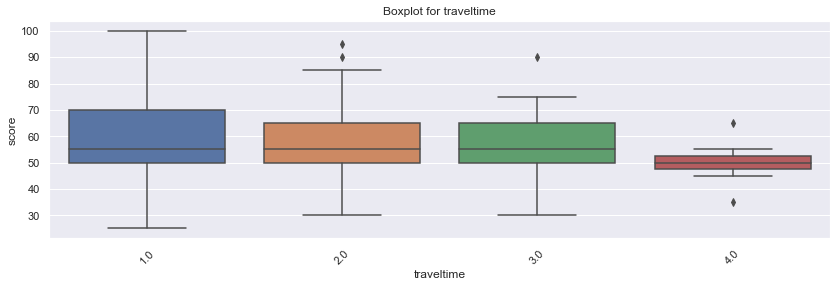

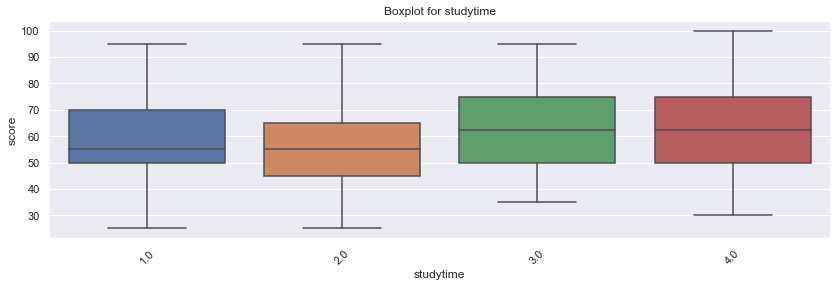

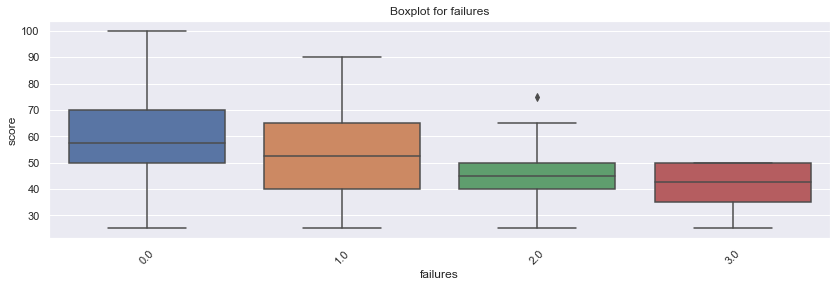

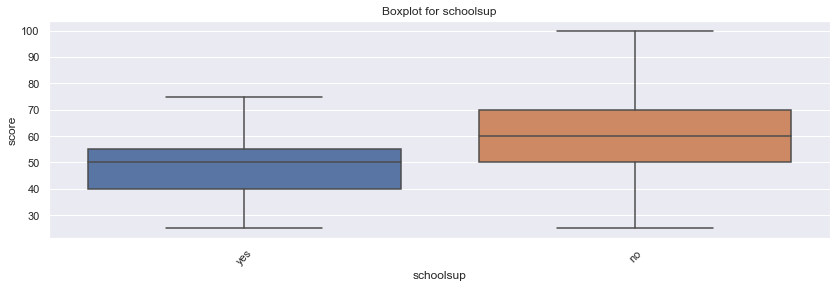

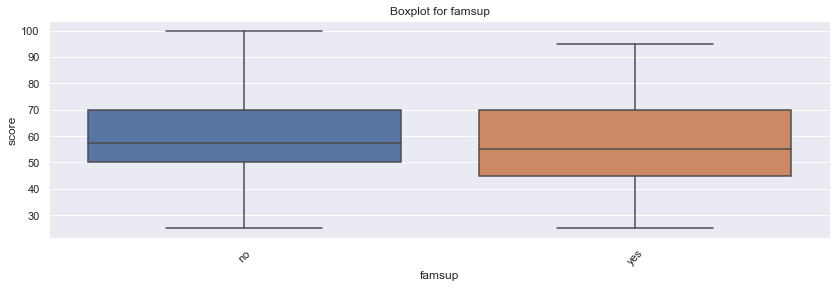

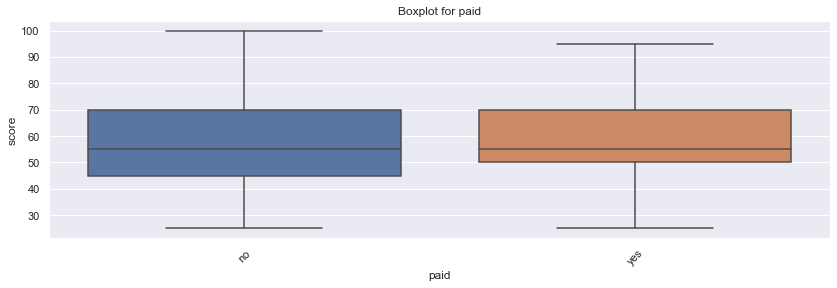

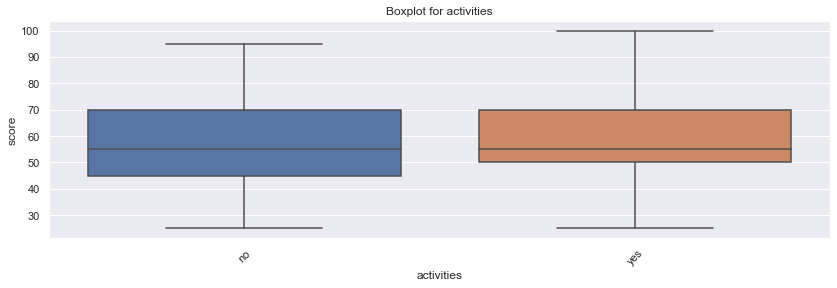

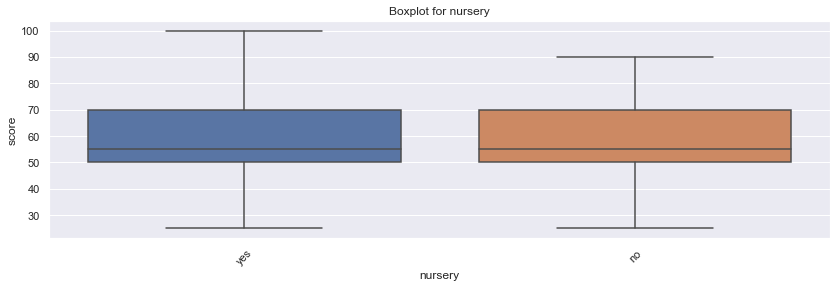

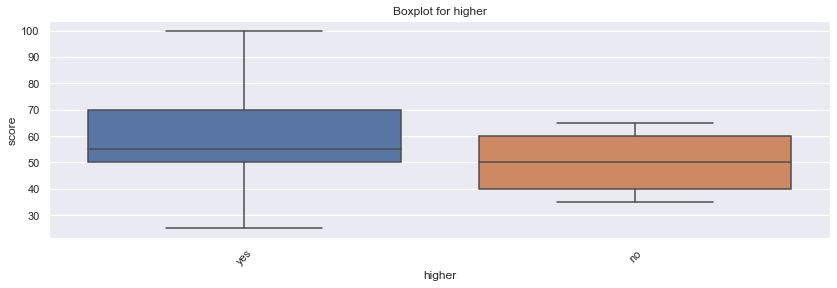

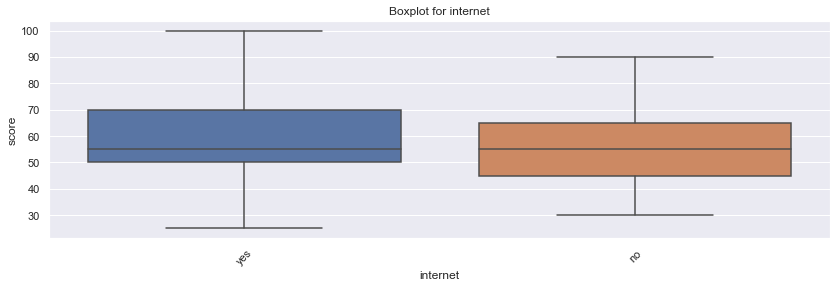

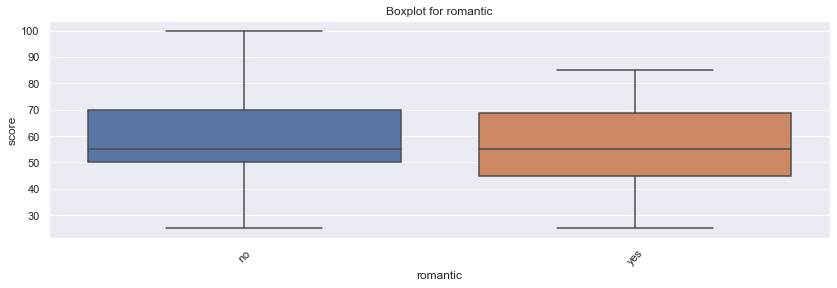

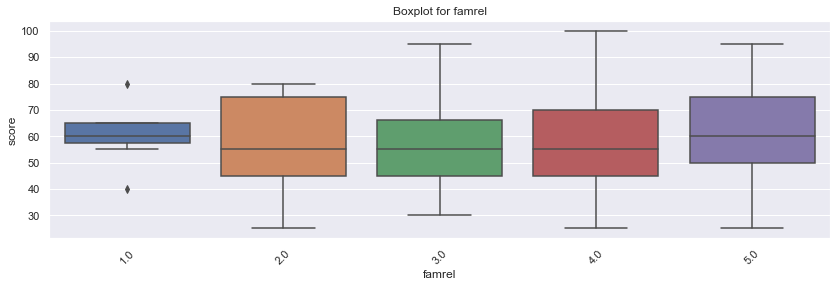

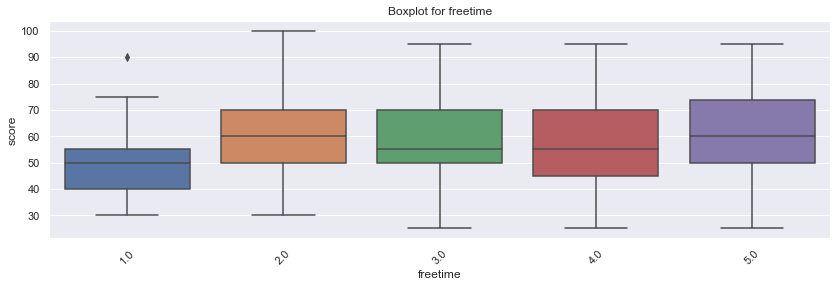

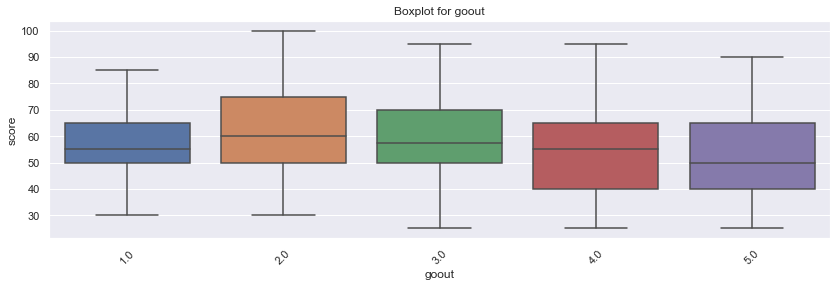

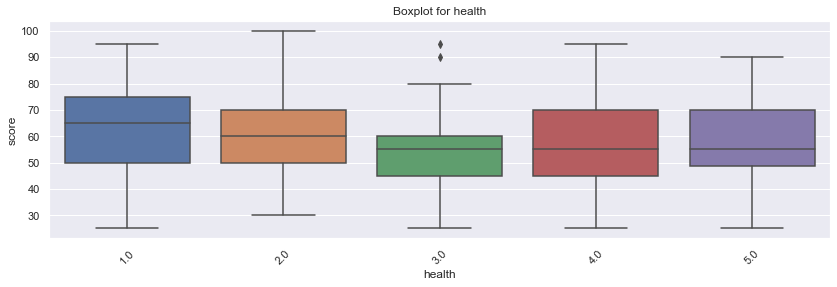

In [80]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students_init,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Из графиков видно, что так или иначе могут оказывать влияние на целевую переменную следующие параметры:  <br>
<b>address</b> - Баллы городских учеников немного выше, чем баллы сельских.<br>
<b>Medu/Fedu</b> - Образование матери/отца имеет влияние.<br>
<b>Mjob/Fjob</b> - Профессия матери/отца имеет влияние.<br>
<b>failures</b> - Те, кто имеет внеучебные неудачи - получают более низкий балл. <br>
<b>schoolsup</b> - Те, кому оказывается дополнительная образовательная поддержка, имеют более низкие баллы. Возможно, школьная поддержка оказывается "неуспевающим" ученикам. <br>
<b>higher</b> - Ученики, стремящиеся получить высшее образование, имеют более высокий итоговый балл. <br>
<b>goout</b> - Ученики, которые проводят много времени с друзьями получают более низкую оценку. <br>

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью статистического теста.

In [81]:
def get_stat_dif(stud, column):
    combinations_all = list(combinations(
        stud.loc[:, column].dropna().unique(), 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'].dropna(),
                     stud.loc[stud.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [82]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(students_init, col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки health


Исходя из статистического теста, серьезно отличаются следующие параметры - <b>sex, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, health</b>.<br>
<br>
Итак, учитывая анализ, проведенный выше, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: <b>'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'studytime', 'failures', 'schoolsup', 'higher','goout', 'health', 'absences'</b>.

Создадим датасет <b>students</b> для дальнейшего построения модели:

In [83]:
students = students_init.loc[:, ['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'studytime', 'failures', 'schoolsup', 'higher',
                                 'goout', 'health', 'absences']]

In [84]:
display(students.head(10))
students.info()

,sex,age,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,higher,goout,health,absences
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,yes,4.0,3.0,6.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,yes,3.0,3.0,4.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,yes,2.0,3.0,10.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,2.0,5.0,2.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,2.0,5.0,4.0
5,M,16,U,4.0,3.0,services,2.0,0.0,no,yes,2.0,5.0,10.0
6,M,16,U,2.0,2.0,other,2.0,0.0,no,yes,4.0,3.0,0.0
7,F,17,U,4.0,4.0,other,2.0,0.0,yes,yes,4.0,1.0,6.0
8,M,15,U,3.0,2.0,services,2.0,0.0,no,yes,2.0,1.0,0.0
9,M,15,U,3.0,4.0,other,2.0,0.0,no,yes,1.0,5.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        372 non-null    object 
 1   age        372 non-null    int64  
 2   address    372 non-null    object 
 3   Medu       372 non-null    float64
 4   Fedu       372 non-null    float64
 5   Mjob       372 non-null    object 
 6   studytime  372 non-null    float64
 7   failures   372 non-null    float64
 8   schoolsup  372 non-null    object 
 9   higher     372 non-null    object 
 10  goout      372 non-null    float64
 11  health     372 non-null    float64
 12  absences   372 non-null    float64
dtypes: float64(7), int64(1), object(5)
memory usage: 50.7+ KB
